# Tanzania Water Wells

## EDA & Cleaning

In [1]:
#Essential imports

import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#training data provided
train = pd.read_csv('data/Train.csv')
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
#already established functional and non-functional
status = pd.read_csv('data/TrainLabels.csv')
status.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [4]:
# merge train with labels 
df = train.merge(status,on="id")
df.head()

#copy OG 
tanzania = df.copy()

In [5]:
#shape and types
df.shape

df.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

### Nulls

In [6]:
## nulls
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [7]:
## Drop worthless columns

In [8]:
df[['scheme_name', 'scheme_management' ,'public_meeting', 'permit']].head() #useless

,scheme_name,scheme_management,public_meeting,permit
0,Roman,VWC,True,False
1,NaN,Other,NaN,True
2,Nyumba ya mungu pipe scheme,VWC,True,True
3,NaN,VWC,True,True
4,NaN,NaN,True,True


In [9]:
#drop scheme name, managament, lat, long, gpa, district code
df.drop(['scheme_name'], axis = 1, inplace = True)
df.drop(['scheme_management'], axis = 1, inplace = True)
df.drop(['latitude'], axis = 1, inplace = True)
df.drop(['longitude'], axis = 1, inplace = True)
df.drop(['gps_height'], axis = 1, inplace = True)
df.drop(['district_code'], axis = 1, inplace = True)

In [10]:
# dropping funder column -- it does not matter for predicting whether their operational or not
df.drop(['funder'], axis = 1, inplace = True)

In [11]:
# change permit, public meeting, and subvillage nulls to unknown 
df['permit'] = df['permit'].fillna('Unknown')
df['public_meeting'] = df['public_meeting'].fillna('Unknown')
df['subvillage'] = df['subvillage'].fillna('Unknown')

In [12]:
# Installer count checks
install_mean = int(df['installer'].value_counts().mean())
install_median = int(df['installer'].value_counts().median())
install_mode = int(df['installer'].value_counts().mode())

print(install_mean)
print(install_median)
print(install_mode)


25
1
1


In [13]:
#dropping this column because there is no value to the model as installers vary too much
df.drop(['installer'], axis = 1, inplace = True)

### Exploring and Cleaning data

In [14]:
## There were several columns with duplicate information, the duplicate columns were dropped from the dataset

In [15]:
# Water quality
df['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [16]:
status_quality = df.groupby(['status_group', 'quality_group']).size()

status_quality

status_group             quality_group
functional               colored            246
                         fluoride           157
                         good             28760
                         milky              438
                         salty             2394
                         unknown            264
functional needs repair  colored             54
                         fluoride            13
                         good              3904
                         milky               14
                         salty              297
                         unknown             35
non functional           colored            190
                         fluoride            47
                         good             18154
                         milky              352
                         salty             2504
                         unknown           1577
dtype: int64

In [17]:
# Water quantity
df['quantity_group'].value_counts()
df['quantity'].value_counts() #duplicate



enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [18]:
# duplicates

In [19]:
# extraction
df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [20]:
df['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [21]:
df['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [22]:
#construction year--- using mode or median here could hurt our analysis as we're trying to see if when it was 
# affects the operability of the well
df['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [23]:
# converting 0's into nan for future imputer to recognize data is missing
#df['construction_year'] = df['construction_year'].replace(0, np.nan)


In [24]:
#adding well age column
df['Age'] = (2023 - df['construction_year'])

In [25]:
df.head()

,id,amount_tsh,date_recorded,wpt_name,num_private,basin,subvillage,region,region_code,lga,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,Age
0,69572,6000.0,2011-03-14,none,0,Lake Nyasa,Mnyusi B,Iringa,11,Ludewa,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,24
1,8776,0.0,2013-03-06,Zahanati,0,Lake Victoria,Nyamara,Mara,20,Serengeti,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,13
2,34310,25.0,2013-02-25,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,Simanjiro,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,14
3,67743,0.0,2013-01-28,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,Nanyumbu,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,37
4,19728,0.0,2011-07-13,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,Karagwe,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2023


In [26]:
#payment

In [27]:
df['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [28]:
df['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [29]:
#duplicate columns so dropping payment
df.drop(['payment'], axis = 1, inplace = True)

In [30]:
# region

df['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [31]:
df['region_code'].value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [32]:
## dropping region code column 
df.drop(['region_code'], axis = 1, inplace = True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   wpt_name               59400 non-null  object 
 4   num_private            59400 non-null  int64  
 5   basin                  59400 non-null  object 
 6   subvillage             59400 non-null  object 
 7   region                 59400 non-null  object 
 8   lga                    59400 non-null  object 
 9   ward                   59400 non-null  object 
 10  population             59400 non-null  int64  
 11  public_meeting         59400 non-null  object 
 12  recorded_by            59400 non-null  object 
 13  permit                 59400 non-null  object 
 14  construction_year      59400 non-null  int64  
 15  ex

In [34]:
## dropping ID and name column
df.drop(['id'], axis = 1, inplace = True)
df.drop(['wpt_name'], axis = 1, inplace = True)

In [35]:
#Management and management Group

In [36]:
df['management'].value_counts()
df['management'] = df['management'].replace('other - school', 'school')

In [37]:
#need more explicit management company -- dropping group
df['management_group'].value_counts()
df.drop(['management_group'], axis = 1, inplace = True)

In [38]:
## source

In [39]:
df['source'].value_counts()


spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [40]:
df['source_class'].value_counts()


groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [41]:
df['source_type'].value_counts()


spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [42]:
## dropping source_type because it's similar to source
df.drop(['source_type'], axis = 1, inplace = True)

In [43]:
#dropping source_class because we need more detailed source data --unknown and other are about the same 
df.drop(['source_class'], axis = 1, inplace = True)

In [44]:
## waterpoint

In [45]:
df['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [46]:
#dropping this column as it's duplicate with one less category 

df['waterpoint_type_group'].value_counts()

df.drop(['waterpoint_type_group'], axis = 1, inplace = True)

In [47]:
# dropping lga as it's similar to region
df['lga'].value_counts()

df.drop(['lga'], axis = 1, inplace = True)

In [48]:
#ward
df['ward'].value_counts()

#huge number of individual types, dropping because it does not easily show trend
df.drop(['ward'], axis = 1, inplace = True)

In [49]:
#num_private
df['num_private'].value_counts()

#dropping num_private because key does not share information??
df.drop(['num_private'], axis = 1, inplace = True)

In [50]:
#recorded by
df['recorded_by'].value_counts()

#dropping because it's the same for all entries, we can include that detail in the readme
df.drop(['recorded_by'], axis = 1, inplace = True)

In [51]:
#date_recorded # keep for now?
df['date_recorded'].value_counts()

2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2011-09-08      1
2011-08-30      1
2011-09-16      1
2011-09-27      1
2013-01-06      1
Name: date_recorded, Length: 356, dtype: int64

### Plots

- Water quality
- Water quantity
- Extraction type
- Payment

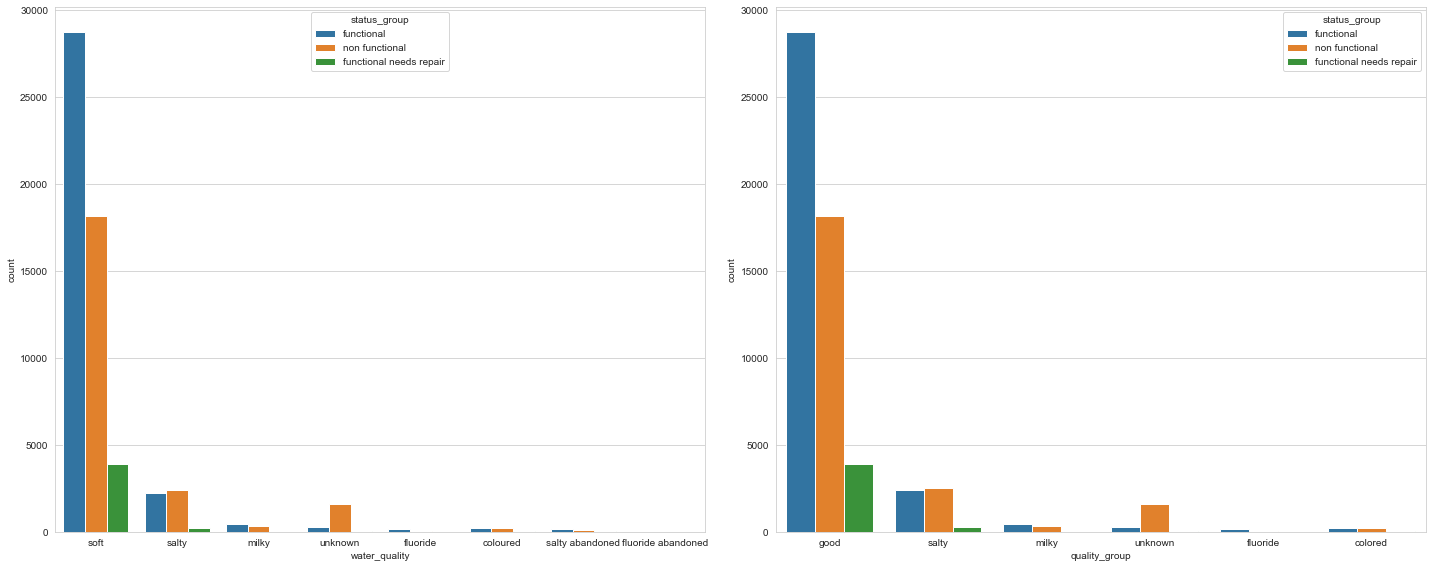

In [52]:
#comparing categories for water quality

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

#water_quality x status group
sns.countplot(x = df['water_quality'], hue = "status_group", data = df, ax = axes[0])

# quality group x status group
sns.countplot(x = df['quality_group'], hue = "status_group", data = df, ax = axes[1])


plt.tight_layout()


In [53]:
# they're identical and the abandoned don't have a significant effect, so we're going to only keep one. 

#dropping water_quality
df.drop(['water_quality'], axis = 1, inplace = True)

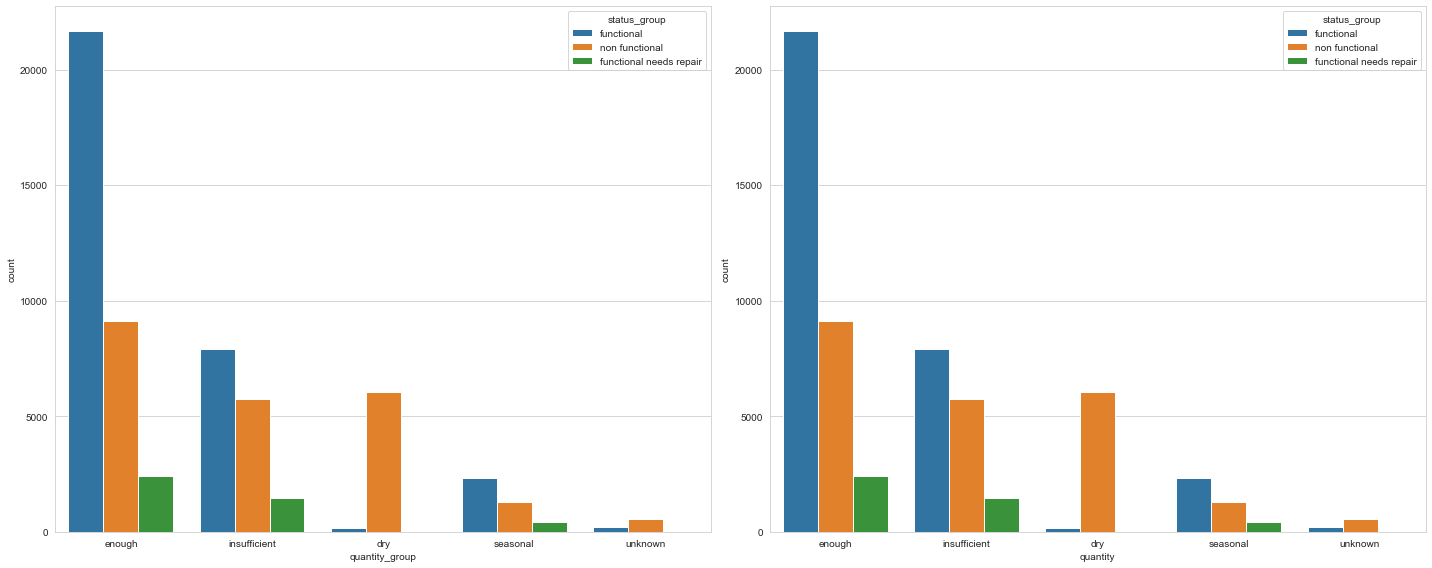

In [54]:
#comparing categories for water quantity

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

#quantity group x status group
sns.countplot(x = df['quantity_group'], hue = "status_group", data = df, ax = axes[0])

# quantity x status group
sns.countplot(x = df['quantity'], hue = "status_group", data = df, ax = axes[1])

plt.tight_layout()

In [55]:
## dropping duplicate column

df.drop(['quantity_group'], axis = 1, inplace = True)

Text(0.5, 1.0, 'extraction type class x status group')

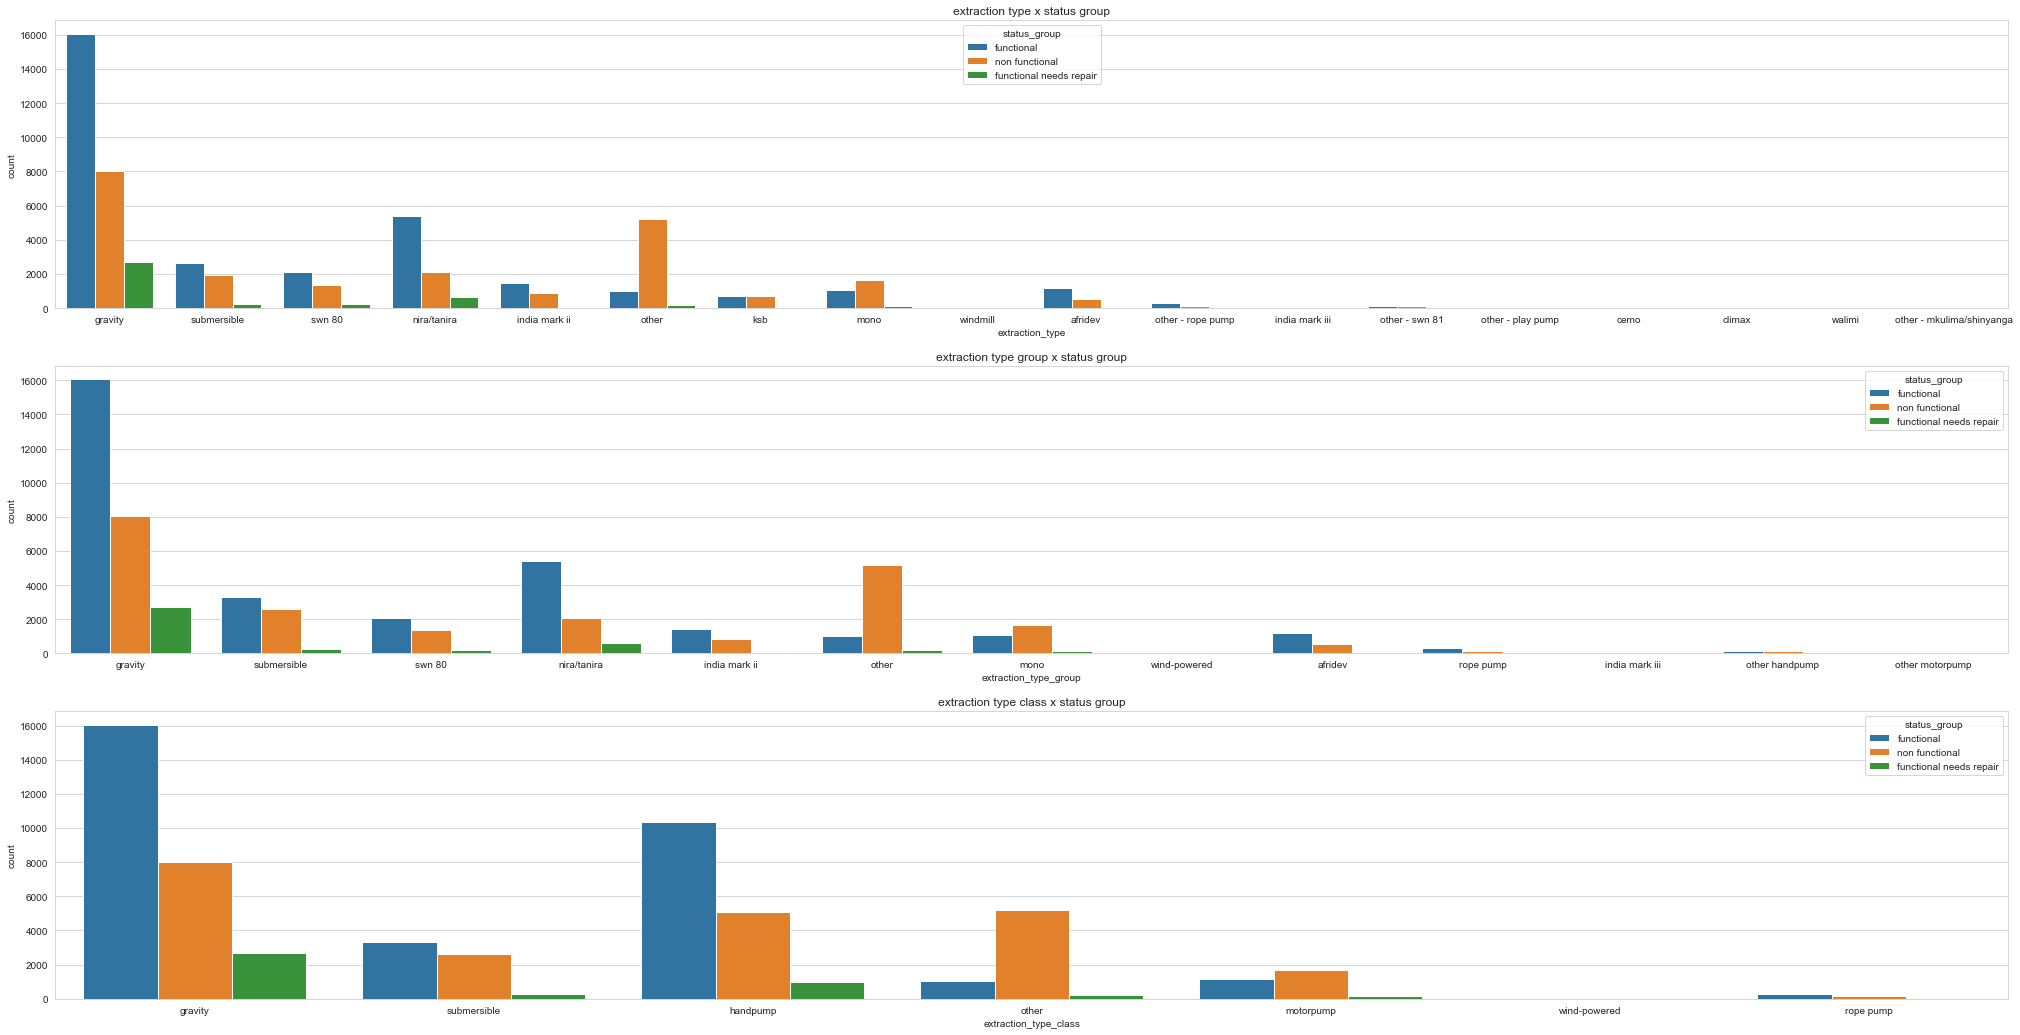

In [56]:

#extraction type x status_group

fig, axes = plt.subplots(3, 1, figsize=(35, 18))

#plot each column to compare
sns.countplot(x = 'extraction_type', hue = 'status_group', data = df, ax = axes[0])
axes[0].set_title('extraction type x status group')

sns.countplot(x = 'extraction_type_group', hue = 'status_group', data = df, ax = axes[1])
axes[1].set_title('extraction type group x status group')

sns.countplot(x = 'extraction_type_class', hue = 'status_group', data = df, ax = axes[2])
axes[2].set_title('extraction type class x status group')




In [57]:
# They are similar in the primary extraction types -- dropping the other two cols

df.drop(['extraction_type'], axis = 1, inplace = True)
df.drop(['extraction_type_group'], axis = 1, inplace = True)

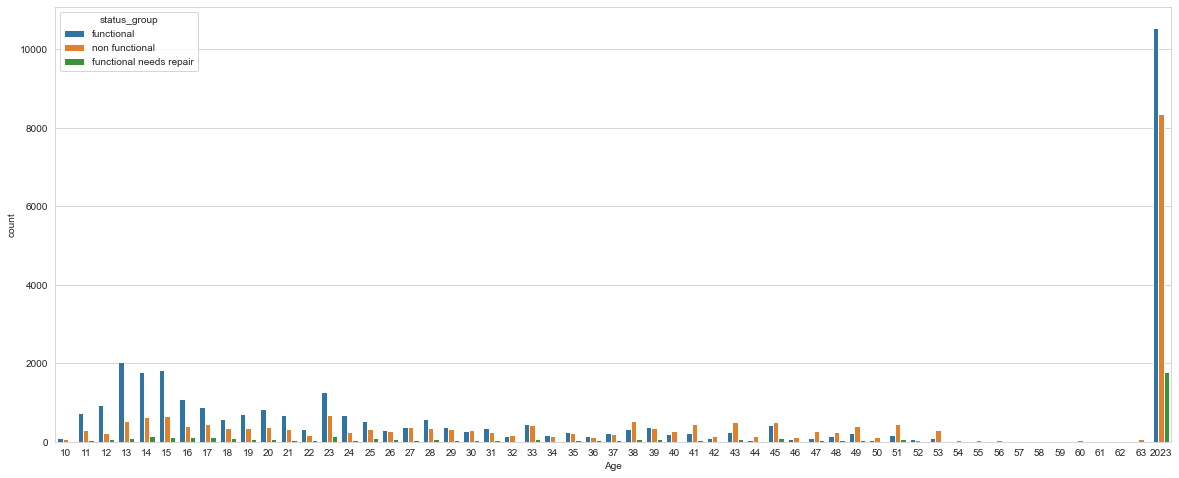

In [58]:
#age x status

plt.figure(figsize=(20, 8))
sns.countplot(x = 'Age', hue = 'status_group', data = df);

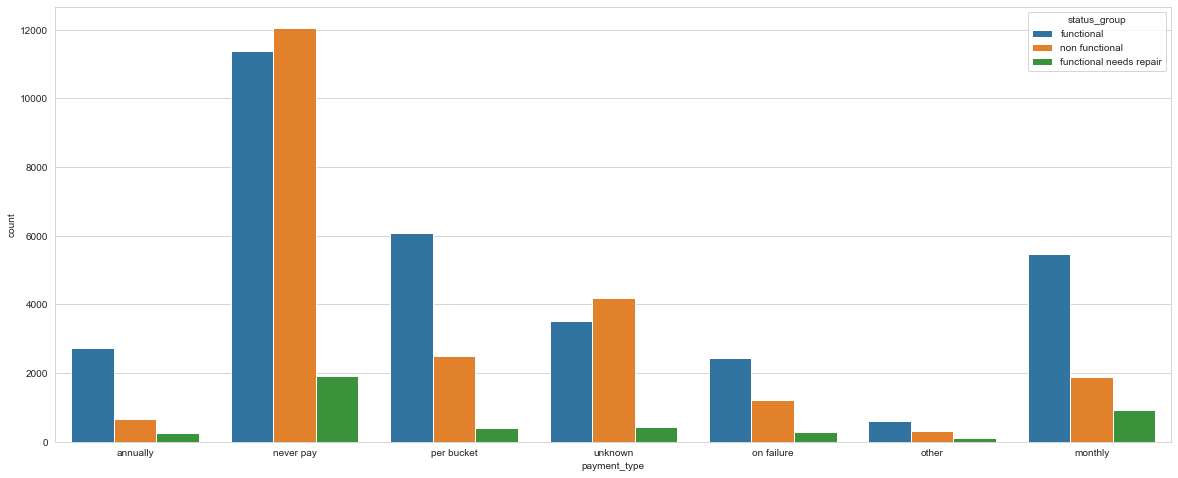

In [59]:
#payment x status

plt.figure(figsize=(20, 8))
sns.countplot(x = 'payment_type', hue = 'status_group', data = df);

In [60]:
# not surprised that the marjority non-functional wells are never paid for, there is like a relation to upkeep

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   basin                  59400 non-null  object 
 3   subvillage             59400 non-null  object 
 4   region                 59400 non-null  object 
 5   population             59400 non-null  int64  
 6   public_meeting         59400 non-null  object 
 7   permit                 59400 non-null  object 
 8   construction_year      59400 non-null  int64  
 9   extraction_type_class  59400 non-null  object 
 10  management             59400 non-null  object 
 11  payment_type           59400 non-null  object 
 12  quality_group          59400 non-null  object 
 13  quantity               59400 non-null  object 
 14  source                 59400 non-null  object 
 15  wa

## Export final df

In [63]:
df.to_csv('final_df.csv', index = False)